<a href="https://colab.research.google.com/github/rubymanderna/ML_ECGR5105/blob/main/Homework%202_ML/Homework2_Q2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

2.a) Repeat problem 1 a, this time with input normalization and input standardization as part of your pre-processing logic. You need to perform two separate trainings for standardization and normalization. In both cases, you do not need to normalize the output!

Plot the training and validation losses for both training and validation set based on input standardization and input normalization. Compare your training accuracy between both scaling approaches as well as the baseline training in problem 1 a. Which input scaling achieves the best training? Explain your results.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Load the dataset
df = pd.read_csv("/content/drive/MyDrive/ML_ECGR5105/Housing.csv")
# print(df.head())

In [3]:
selected_columns = ['area', 'bedrooms', 'bathrooms','stories','parking','price']
df_new = df[selected_columns].copy()
# print(df_new)

In [4]:
from sklearn.model_selection import train_test_split

# Define the preprocess_data_1 function

def preprocess_data_1(df_new):
    X = df_new[['area', 'bedrooms', 'bathrooms', 'stories', 'parking']].values
    y = df_new['price'].values
    m = len(y)
    X_0 = np.ones((m, 1))
    X = np.hstack((X_0, X))
    return X, y, m

# Define the gradient descent function

def gradient_descent(X, y, theta, alpha, iterations):
  m = len(y)
  cost_history = np.zeros(iterations)
  for i in range(iterations):
      predictions = X.dot(theta)

      errors = predictions - y
      theta -= (alpha / m) * (X.T.dot(errors))
      cost_history[i] = compute_cost(X, y, theta)
  return theta, cost_history

def compute_cost(X, y, theta):
  m = len(y)
  predictions = X.dot(theta)
  errors = predictions - y
  J = 1 / (2 * m) * np.sum(errors**2)
  return J

def train_and_plot_losses(X_train, y_train, X_val, y_val, learning_rates, iterations):
    best_mse = float('inf')
    best_learning_rate = None
    best_theta = None

    for alpha in learning_rates:
        train_losses = []  # Reset train_losses for each learning rate
        val_losses = []  # Reset val_losses for each learning rate
        theta = np.zeros(X_train.shape[1])  # Initialize theta for each learning rate

        for iteration in range(iterations):
            theta, cost_history = gradient_descent(X_train, y_train, theta.copy(), alpha, iterations)
            train_loss = compute_cost(X_train, y_train, theta)
            val_loss = compute_cost(X_val, y_val, theta)

            train_losses.append(train_loss)
            val_losses.append(val_loss)

# Track best MSE and parameters
        if val_loss < best_mse:
            best_mse = val_loss
            best_learning_rate = alpha
            best_theta = theta.copy()

        plt.plot(train_losses, label=f"Training Loss (Learning Rate: {alpha})")
        plt.plot(val_losses, label=f"Validation Loss (Learning Rate: {alpha})")

        plt.xlabel("Iteration")
        plt.ylabel("Mean Squared Error")
        plt.legend()
        plt.title("Training and Validation Losses for Different Learning Rates")

        plt.show()

    print(f'Best Learning Rate: {best_learning_rate}')
    print(f'Best MSE: {best_mse}')
    print(f'lowest validation loss: {min(val_losses)}')
    print(f'Best Theta: {best_theta}')

    return best_learning_rate, best_mse, best_theta



In [5]:
# 2(a) for 1a
#data noramlization without normalizing the output
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Initialize the MinMaxScaler for normalization
min_max_scaler = MinMaxScaler()
num_vars = ['area', 'bedrooms', 'bathrooms','stories','parking']
# Create a copy of the original DataFrame for standardization
df_normalized = df_new.copy()
df_normalized[num_vars] = min_max_scaler.fit_transform(df_normalized[num_vars])



In [6]:
#data standardization without normalizing the output
# Create a copy of the original DataFrame for standardization
df_standardized = df_new.copy()
# Initialize the StandardScaler for standardization
standard_scaler = StandardScaler()
# Apply the scaler to the selected columns
df_standardized[num_vars] = standard_scaler.fit_transform(df_standardized[num_vars])

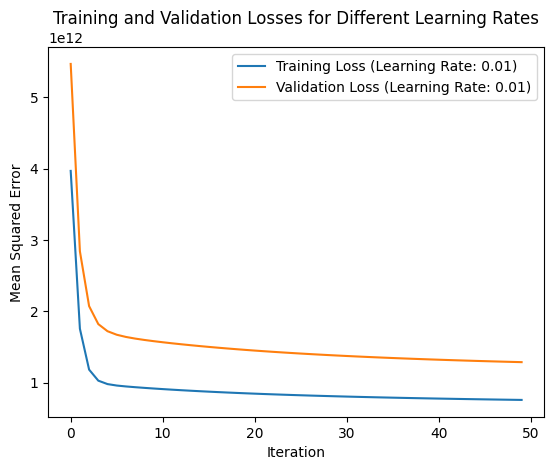

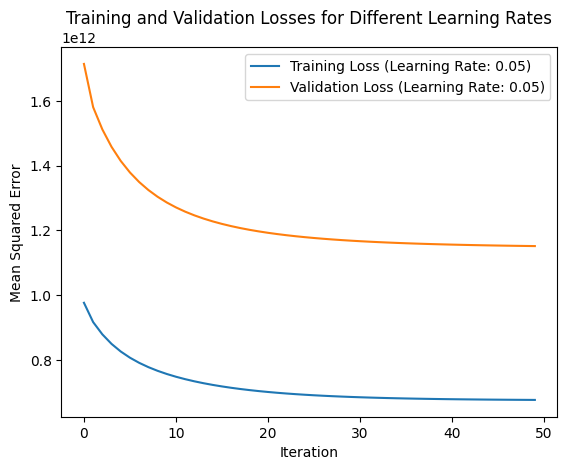

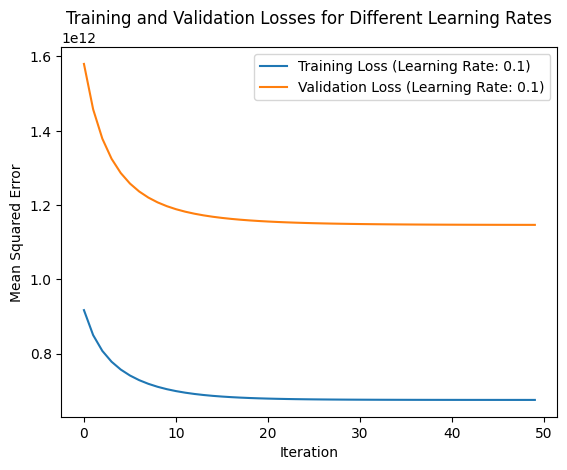

Best Learning Rate: 0.1
Best MSE: 1146426323566.8489
lowest validation loss: 1146426323566.8489
Best Theta: [2381358.87480979 4469228.19483655  809959.68278102 3526069.83091537
 1479685.60357609 1018953.45814807]
0.1


In [7]:
# Define the preprocess_data_2 for normalized function
# Preprocess the data
X, y, m = preprocess_data_1(df_normalized)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Set up learning rates and iterations
learning_rates = [0.01, 0.05, 0.1]
iterations = 50
# Assuming X_train, y_train, X_val, y_val, learning_rates, and iterations are defined.
# Call the function
train_and_plot_losses(X_train, y_train, X_val, y_val, learning_rates, iterations)
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

#code to find best lamba parameter forfroblem 2 - 1 a for normalisation data
def find_best_lambda(X_train, y_train):
    model = Ridge()
    param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10]}  # Define a range of lambda values

    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_train)

    best_lambda = grid_search.best_params_['alpha']
    return best_lambda
best_lambda = find_best_lambda(X_train, y_train)
print(best_lambda)

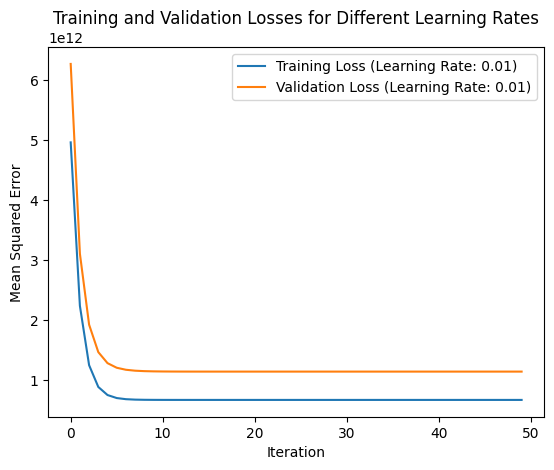

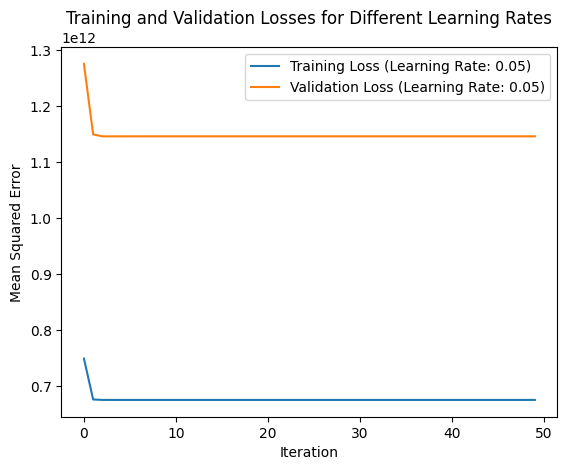

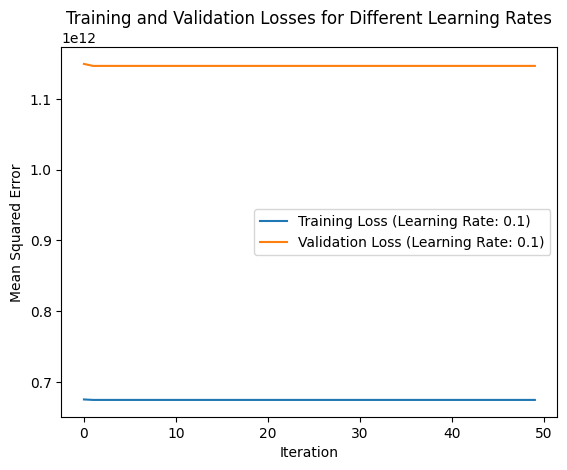

Best Learning Rate: 0.01
Best MSE: 1146360759971.0007
lowest validation loss: 1146311378434.8826
Best Theta: [4744533.72278007  669669.63216998  111527.63436399  595247.04220066
  429101.82648475  290656.75307582]
10


In [8]:
# Define the preprocess_data_1 for standardization function
# Preprocess the data
X, y, m = preprocess_data_1(df_standardized)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Set up learning rates and iterations
learning_rates = [0.01, 0.05, 0.1]
iterations = 50
# Assuming X_train, y_train, X_val, y_val, learning_rates, and iterations are defined.
# Call the function
train_and_plot_losses(X_train, y_train, X_val, y_val, learning_rates, iterations)
#code to find best lamba parameter forfroblem 2 - 1 a for standardization data

def find_best_lambda(X_train, y_train):
    model = Ridge()
    param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10]}  # Define a range of lambda values

    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_train)

    best_lambda = grid_search.best_params_['alpha']
    return best_lambda
best_lambda = find_best_lambda(X_train, y_train)
print(best_lambda)

#Answer 2a

Here we have implemented input Normalization and input Standardization and not normalizing the output!

***normalization:***

The goal of normalization is to rescale the features to a specific range, typically [0, 1].

***Standardization:***

The goal of standardization is to transform the features into a distribution with a mean of 0 and a standard deviation of 1


**For input normalization results***

Best Learning Rate: 0.1

Best MSE: 1146426323566.8489

Best Theta: [2381358.87480979 4469228.19483655  809959.68278102 3526069.83091537
 1479685.60357609 1018953.45814807]

 **For input Standardization results***

Best Learning Rate: 0.01

Best MSE: 1146360759971.0007

Best Theta: [4744533.72278007  669669.63216998  111527.63436399  595247.04220066
  429101.82648475  290656.75307582]

Brief explanations for  observations:

***Large MSE Values:***

The MSE values are large in both the cases because the target variable (price) is also large. This means that even a small prediction error can lead to a significant squared error.

***Best Learning Rate::***

The learning rate of 0.01 was determined to be the best for Standardization and 0.1 for normalization

***Best Theta::***

The best parameters (theta values) are the weights assigned to each feature after training.


2.b) Repeat problem 1 b, this time with input normalization and input standardization as part of your pre-processing logic. You need to perform two separate trainings for standardization and normalization. Experiment between normalizing and not normalizing the output!

Plot the training and validation losses for both training and validation sets based on input standardization and input normalization. Compare your training accuracy between both scaling approaches and the baseline training in problem 1 b. Which input scaling achieves the best training? Explain your results. Experiment between normalizing and not normalizing the output!

In [9]:
#data for 1b
selected_columns_with_labels = ['area', 'bedrooms', 'bathrooms','stories','mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea','parking','price']
df_new_b = df[selected_columns_with_labels].copy()


In [10]:
# Mapping categorical to numerical values
# List of variables to map

varlist =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

# Defining the map function
def binary_map(x):
    return x.map({'yes': 1, 'no': 0})

# Applying the function to the housing list
df_new_b[varlist] = df_new_b[varlist].apply(binary_map)


In [11]:
#data standardization without standardization the output
from sklearn.preprocessing import StandardScaler, MinMaxScaler
selected_columns_without_labels = ['area', 'bedrooms', 'bathrooms','stories','mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning','parking', 'prefarea','parking']
# Create a copy of the original DataFrame for standardization
df_standardized_b = df_new_b.copy()
# Initialize the StandardScaler for standardization
standard_scaler = StandardScaler()
# Apply the scaler to the selected columns
df_standardized_b[selected_columns_without_labels] = standard_scaler.fit_transform(df_standardized_b[selected_columns_without_labels])

In [12]:
#data noramlization without normalizing the output
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Initialize the MinMaxScaler for normalization
min_max_scaler = MinMaxScaler()
# Create a copy of the original DataFrame for standardization
df_normalized_b = df_new_b.copy()
df_normalized_b[selected_columns_without_labels] = min_max_scaler.fit_transform(df_normalized_b[selected_columns_without_labels])

In [13]:
# Preprocess the data for 1b
def preprocess_data_1b(df_new_b):
    X = df_new_b[['area', 'bedrooms', 'bathrooms','stories','mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea','parking']].values
    y = df_new_b['price'].values
    m = len(y)
    X_0 = np.ones((m, 1))
    X = np.hstack((X_0, X))
    return X, y, m

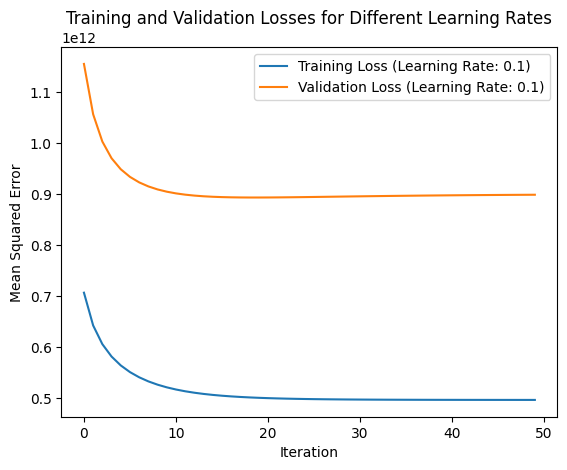

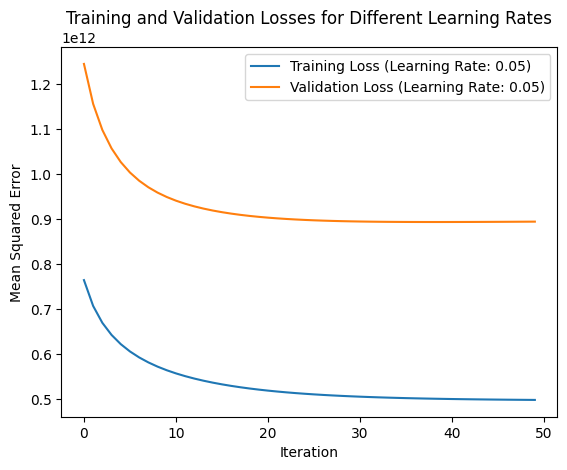

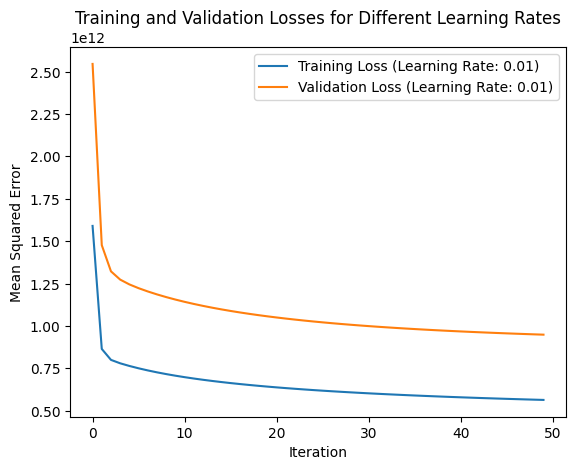

Best Learning Rate: 0.05
Best MSE: 894200375157.158
lowest validation loss: 948997819209.819
Best Theta: [1862578.57522369 3159697.52240934  704778.36309612 3095327.68466319
 1244921.21560689  453891.3670974   266466.14196016  420108.04205516
  721606.05619048  824436.39350421  197106.43900906  197106.43900906
  640989.52213944  197106.43900906  197106.43900906]
best_lambda 0.1


In [14]:
#2.b for 1b - #just input is noramlized and standardized
#for this we will Experiment that is  not normalizing and not standardizing output!
# Define the preprocess_data_2 for normalized function
# Normalized results
X, y, m = preprocess_data_1b(df_normalized_b)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Set up learning rates and iterations
learning_rates = [0.1, 0.05, 0.01]
iterations = 50
# Assuming X_train, y_train, X_val, y_val, learning_rates, and iterations are defined.
# Call the function
train_and_plot_losses(X_train, y_train, X_val, y_val, learning_rates, iterations)
#code to find best lamba parameter forfroblem 2 - 1 b for noramlized data

def find_best_lambda(X_train, y_train):
    model = Ridge()
    param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10]}  # Define a range of lambda values

    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_train)

    best_lambda = grid_search.best_params_['alpha']
    return best_lambda
best_lambda = find_best_lambda(X_train, y_train)
print('best_lambda', best_lambda)

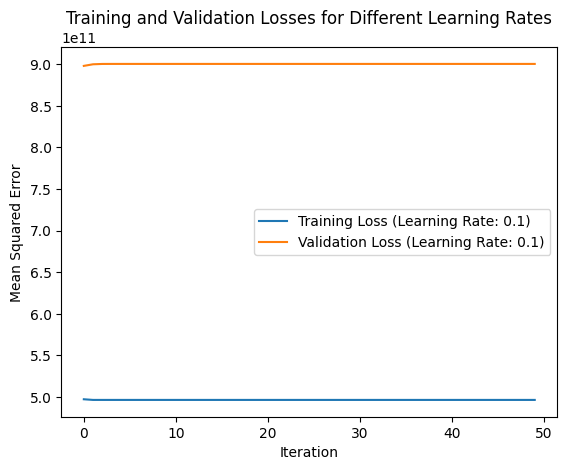

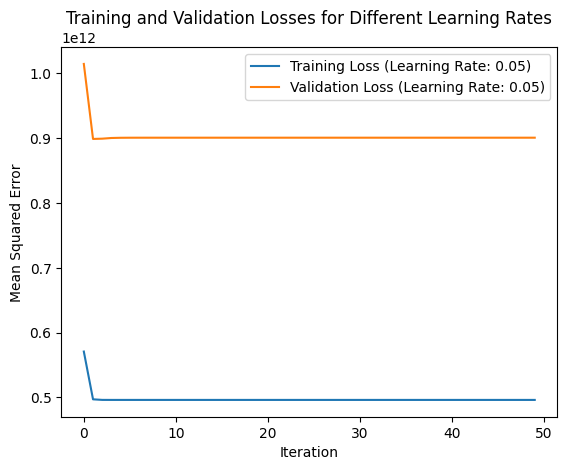

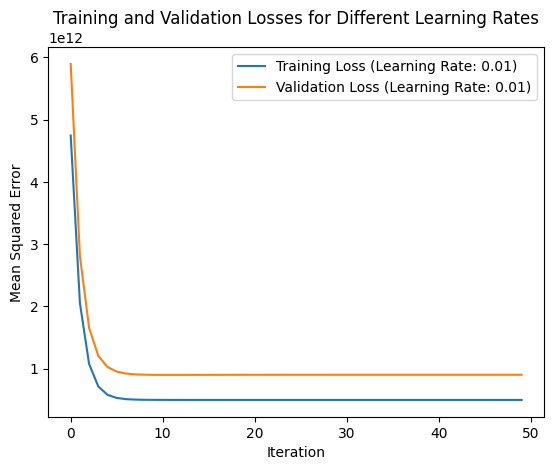

Best Learning Rate: 0.01
Best MSE: 900396412193.7216
lowest validation loss: 898043906330.776
Best Theta: [4741436.23247484  515389.20892832   57876.49291725  556892.00570972
  369994.59544521  143743.56800689   93181.59374092  207542.1835159
  149011.13963382  375716.08128541   53249.36413649   53249.36413649
  269942.79014196   53249.36413649   53249.36413649]
10


In [15]:
#2.b for 1b - #just input is noramlized and standardized
#for this we will Experiment that is  not normalizing and not standardizing output!
#just input is noramlized and standardized
# Define the preprocess_data_2 for standardization function
# Standardization results
X, y, m = preprocess_data_1b(df_standardized_b)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Set up learning rates and iterations
learning_rates = [0.1, 0.05, 0.01]
iterations = 50
# Assuming X_train, y_train, X_val, y_val, learning_rates, and iterations are defined.
# Call the function
train_and_plot_losses(X_train, y_train, X_val, y_val, learning_rates, iterations)
#code to find best lamba parameter forfroblem 2 - 1 b for standardized data

def find_best_lambda(X_train, y_train):
    model = Ridge()
    param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10]}  # Define a range of lambda values

    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_train)

    best_lambda = grid_search.best_params_['alpha']
    return best_lambda
best_lambda = find_best_lambda(X_train, y_train)
print(best_lambda)

#Answer 2b
Here we see the same trend although we tried to add few more features but got some better result.

Here we have implemented input Normalization and input Standardization and not normalizing the output!


**For input normalization results**

Best Learning Rate: 0.1

with more features Best MSE : 894200375157.158

with less features Best MSE : 1146426323566.8489

**For input Standardization results**

Best Learning Rate: 0.01

with more features Best MSE : 900396412193.7216

with less features Best MSE : 1146360759971.0007


Brief explanations for  observations:

By adding more feature the Best MSE have been improved significantly i have added earlier Best MSE  for comparision. Normalization result is comparitively better


# Below code is with feature and label both standardization and normalization

---



In [21]:
#data standardization with standardization the output
from sklearn.preprocessing import StandardScaler, MinMaxScaler
selected_columns_with_labels = ['area', 'bedrooms', 'bathrooms','stories','mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea','parking','price']
# Create a copy of the original DataFrame for standardization
df_standardized_b_with_labels = df_new_b.copy()
# Initialize the StandardScaler for standardization
standard_scaler = StandardScaler()
# Apply the scaler to the selected columns
df_standardized_b_with_labels[selected_columns_with_labels] = standard_scaler.fit_transform(df_standardized_b_with_labels[selected_columns_with_labels])

In [22]:
#data noramlization without normalizing the output
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Initialize the MinMaxScaler for normalization
min_max_scaler = MinMaxScaler()
# Create a copy of the original DataFrame for standardization
df_normalized_b_with_labels = df_new_b.copy()
df_normalized_b_with_labels[selected_columns_with_labels] = min_max_scaler.fit_transform(df_normalized_b_with_labels[selected_columns_with_labels])

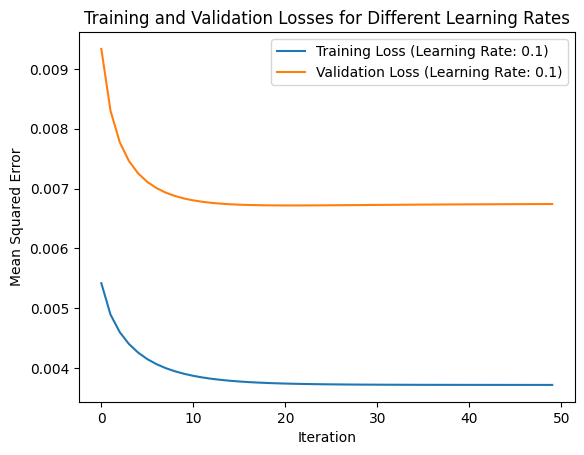

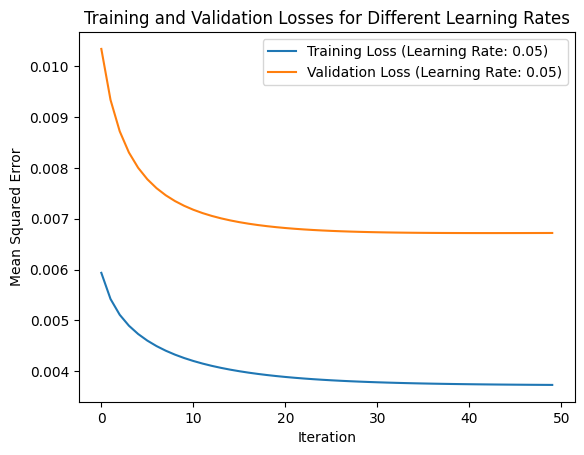

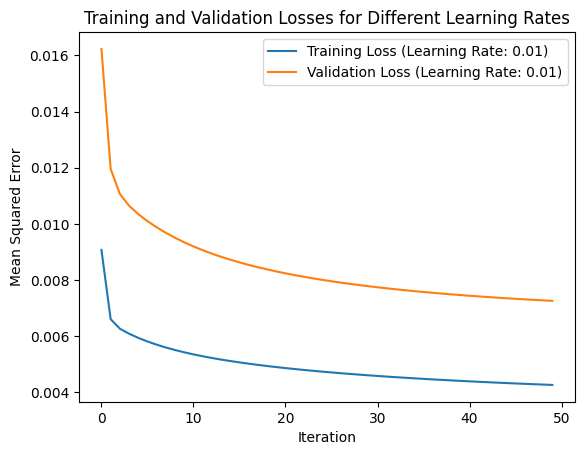

Best Learning Rate: 0.05
Best MSE: 0.0067199252998641264
lowest validation loss: 0.00725534588562712
Best Theta: [0.0128204  0.2721612  0.0531113  0.27133758 0.10916109 0.03874821
 0.02308442 0.0365709  0.06235461 0.07137208 0.01716354 0.01716354
 0.05579037 0.01716354 0.01716354]
0.1


In [23]:
#2.b for 1b -
#for this we will Experiment that is  normalizing and standardizing output!
# Define the preprocess_data_2 for normalized function
# Normalized results
X, y, m = preprocess_data_1b(df_normalized_b_with_labels)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Set up learning rates and iterations
learning_rates = [0.1, 0.05, 0.01]
iterations = 50
# Assuming X_train, y_train, X_val, y_val, learning_rates, and iterations are defined.
# Call the function
train_and_plot_losses(X_train, y_train, X_val, y_val, learning_rates, iterations)
#code to find best lamba parameter forfroblem 2 - 1 b for normalized data bot input and output

def find_best_lambda(X_train, y_train):
    model = Ridge()
    param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10]}  # Define a range of lambda values

    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_train)

    best_lambda = grid_search.best_params_['alpha']
    return best_lambda
best_lambda = find_best_lambda(X_train, y_train)
print(best_lambda)

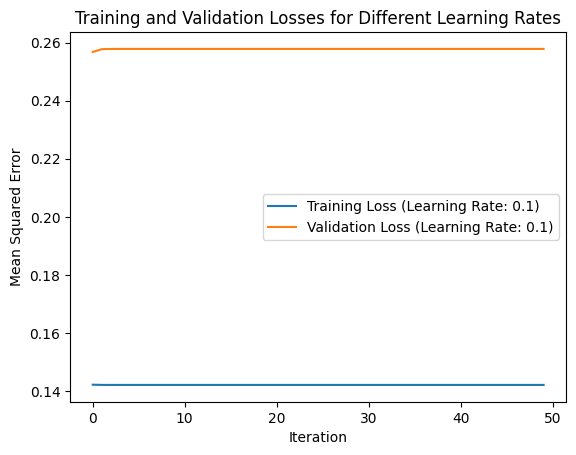

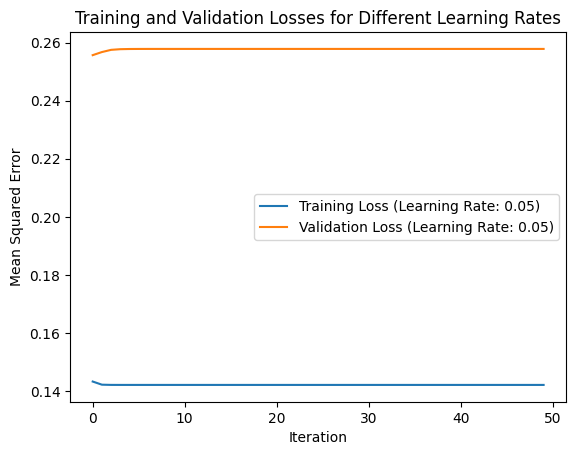

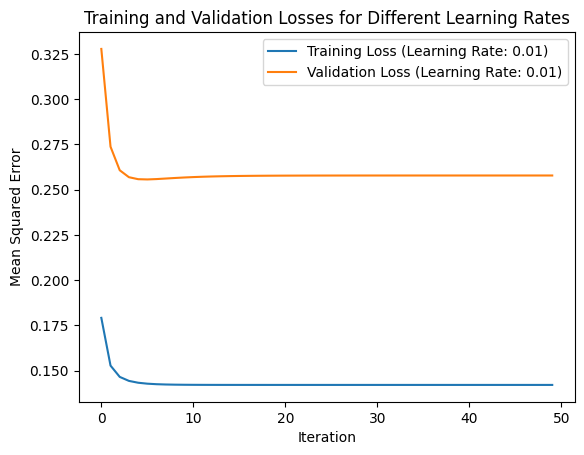

Best Learning Rate: 0.01
Best MSE: 0.2578362515143556
lowest validation loss: 0.2556578913228672
Best Theta: [-0.01353491  0.27579742  0.03097122  0.29800691  0.19799303  0.07692082
  0.04986393  0.11106073  0.07973959  0.20105511  0.02849505  0.02849505
  0.14445315  0.02849505  0.02849505]
10


In [24]:
#2.b for 1b -
#for this we will Experiment that is   normalizing and  standardizing output!

# Define the preprocess_data_2 for standardization function
# Standardization results
X, y, m = preprocess_data_1b(df_standardized_b_with_labels)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Set up learning rates and iterations
learning_rates = [0.1, 0.05, 0.01]
iterations = 50
# Assuming X_train, y_train, X_val, y_val, learning_rates, and iterations are defined.
# Call the function
train_and_plot_losses(X_train, y_train, X_val, y_val, learning_rates, iterations)
#code to find best lamba parameter forfroblem 2 - 1 b for standardization data bot input and output

def find_best_lambda(X_train, y_train):
    model = Ridge()
    param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10]}  # Define a range of lambda values

    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_train)

    best_lambda = grid_search.best_params_['alpha']
    return best_lambda
best_lambda = find_best_lambda(X_train, y_train)
print(best_lambda)

#Answer 2b with feature and label normalized and Standardization


Here we have implemented input Normalization and input Standardization and normalizing,Standardization the output!


**For input normalization results**

Best Learning Rate: 0.05

Best MSE: 0.0067199252998641264

Best Theta: [0.0128204  0.2721612  0.0531113  0.27133758 0.10916109 0.03874821
 0.02308442 0.0365709  0.06235461 0.07137208 0.01716354 0.01716354
 0.05579037 0.01716354 0.01716354]
0.1

**For input Standardization results**

Best Learning Rate: 0.01

Best MSE : 0.2578362515143556


Best Theta: [-0.01353491  0.27579742  0.03097122  0.29800691  0.19799303  0.07692082
  0.04986393  0.11106073  0.07973959  0.20105511  0.02849505  0.02849505
  0.14445315  0.02849505  0.02849505]

Brief explanations for  observations:

By adding feature and label normalized and Standardization Best MSE have been improved significantly and more readable now since all column have been scaled by doing this model is also able to learn properly
Comparitivley, Normalization performs better with Best MSE: 0.0067199252998641264
